Thomas Tatum - Assignment 8 - CSCI 5015 - Data Science in Python - Due 8/1/22

In [182]:
# Importing HW7 stuff

import pandas as pd
import numpy as np

tn = pd.read_csv(
    "data/TN.TXT", names=["state", "sex", "year", "name", "count"])
al = pd.read_csv(
    "data/AL.TXT", names=["state", "sex", "year", "name", "count"])
ga = pd.read_csv(
    "data/GA.TXT", names=["state", "sex", "year", "name", "count"])
ms = pd.read_csv(
    "data/MS.TXT", names=["state", "sex", "year", "name", "count"])

southnames = pd.concat([tn, al, ga, ms], axis=0)


pivot1 = pd.pivot_table(southnames, values='count', index=[
                        'state'], columns=['sex'], aggfunc=np.sum)


female_total = np.sum(pivot1['F'])

male_total = np.sum(pivot1['M'])



bystate = pd.pivot_table(southnames, values='count',
                         index=['state'], aggfunc=np.sum)



topnames = pd.pivot_table(southnames, values='count',
                          index=['name'], aggfunc=np.sum)
topnames = topnames.sort_values(by='count', ascending=False)



femalenames = pd.pivot_table(southnames[southnames.sex == 'F'], values='count', index=[
                             'name'], aggfunc=np.sum).sort_values(by='count', ascending=False)



malenames = pd.pivot_table(southnames[southnames.sex == 'M'], values='count', index=[
                           'name'], aggfunc=np.sum).sort_values(by='count', ascending=False)





Part 1

In this assignment, you will be creating visualizations based on some of the plots that we looked at in Chapter 9.

    1. Create 5 tables based on the 5 most popular names discovered in your last assignment. Each table will be a pivot table of the count of the number of babies born with that name by year.

   


In [183]:
topnames[0:5]

,count
name,
James,636569
Mary,436895
William,424178
John,390960
Robert,355304


In [184]:
# Create 5 tables based on the 5 most popular names discovered in your last assignment.
# Each table will be a pivot table of the count of the number of babies born
# with that name by year.


In [185]:

james = pd.pivot_table(southnames.where(
    southnames['name'] == 'James'), values='count', index=['name', 'year'], aggfunc=np.sum)
print(james.head())


               count
name  year          
James 1910.0  2054.0
      1911.0  2013.0
      1912.0  3397.0
      1913.0  3957.0
      1914.0  4962.0


In [186]:

mary = pd.pivot_table(southnames.where(
    southnames['name'] == 'Mary'), values='count', index=['name', 'year'], aggfunc=np.sum)
print(mary.head())


              count
name year          
Mary 1910.0  3221.0
     1911.0  3041.0
     1912.0  3897.0
     1913.0  4288.0
     1914.0  5033.0


In [187]:

william = pd.pivot_table(southnames.where(
    southnames['name'] == 'William'), values='count', index=['name', 'year'], aggfunc=np.sum)
print(william.head())


                 count
name    year          
William 1910.0  1381.0
        1911.0  1372.0
        1912.0  2367.0
        1913.0  2716.0
        1914.0  3399.0


In [188]:

john = pd.pivot_table(southnames.where(
    southnames['name'] == 'John'), values='count', index=['name', 'year'], aggfunc=np.sum)
print(john.head())


              count
name year          
John 1910.0  1677.0
     1911.0  1657.0
     1912.0  2581.0
     1913.0  3008.0
     1914.0  3673.0


In [189]:

robert = pd.pivot_table(southnames.where(
    southnames['name'] == 'Robert'), values='count', index=['name', 'year'], aggfunc=np.sum)
print(robert.head())



                count
name   year          
Robert 1910.0  1103.0
       1911.0  1050.0
       1912.0  1709.0
       1913.0  1912.0
       1914.0  2461.0


 2. Create a line plot visualization of each of those five names on a single plot. Each name should be represented with a single color.

        ◦ Each of the plots will be added one at a time to the plot. When you add them, the label will have to be added with it.

        ◦ Make sure that your graph has a title. "5 Most Popular Names from 1910 to Present".

        ◦ Set the x label to be "Year".

        ◦ Set the y label to be "Number Born".

        ◦ Set the ticks along the x-axis to be the years from 1910 to the present in 10 year increments.

        ◦ Make sure that your graph has a legend of which name goes with which color.
        
        ◦ There should be enough data for each year to have at least one baby to be born with this name in each year from 1910 to the present, but if you picked states with small populations, this cannot be guaranteed.

In [190]:
# from tkinter.font import names
import matplotlib.pyplot as plt
from pandas import DataFrame
yearlist = range(1910,2022)
yeardf = pd.DataFrame(yearlist)



<AxesSubplot:xlabel='Year', ylabel='Number Born'>

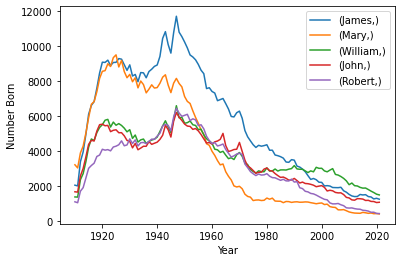

In [191]:
from matplotlib.pyplot import legend, xlabel, xticks, ylabel


jamesmary = pd.merge(
    james,
    mary,
    on=["year"]
)
# jamesmary
williamjohn = pd.merge(
    william,
    john,
    on=["year"]
)
# williamjohn.head()
jmwj = pd.merge(
    jamesmary,
    williamjohn,
    on=["year"]
)
top_pivot = pd.merge(
    jmwj,
    robert,
    on=["year"]
)

topnamelist_forgraph = pd.DataFrame(['James', 'Mary', 'William', 'John', 'Robert'])
top_pivot.columns = topnamelist_forgraph
top_pivot.plot(
    xlabel = str("Year"),
    ylabel = str("Number Born")
)


Part 2

For part 2 on this assignment, I would like to explore those names which aren't strictly given to female or male babies. Names like "Mark" are usually given to males and "Mary" are given to females, but what about "Sam"? How might we discover the 'Sam' names? I know several people named Sam and among those people are both men and women.

Note: To study this problem, I had to use something which I have not taught you yet. Take the "males" and "females" data set which you compiled in the last homework assignment and perform a "reset_index" on them.


In [192]:

females = femalenames.reset_index()
males = malenames.reset_index()



This will reconfigure the data frames to be strictly rows and columns and remove the multilevel indexing that typically comes from pivot tables.

    1. Make sure that your males and females data frames have reset indices. (Shown above.)

    2. Merge males and females on the column "name". This will produce a column named "count_x" and "count_y" (depending on how you merge, the "_x" will represent one sex and the "_y" will represent the other sex, but I can't tell you which one is which without seeing how you merge. If you do "females.merge(males ..." then the "_x" will be female and "_y" will be male and this will align with our chromosomes, which is nice.)


In [193]:
allsex = pd.merge(
    females,
    males,
    on=["name"]
)
allsex

,name,count_x,count_y
0,Mary,435186,1709
1,Betty,131314,355
2,Linda,124484,137
3,Elizabeth,123125,23
4,Dorothy,114678,242
...,...,...,...
1091,Louis,5,21842
1092,Lux,5,10
1093,Harry,5,23709
1094,Harlan,5,736



    3. Filter out any name without at least 500 names in both sexes. I had to break this up into two lines. There is a way to turn this into a single statement, but I haven't taught you that trick.


In [194]:
allsex500f = allsex.where(allsex['count_x'] > 500)
allsex500 = allsex500f.where(allsex500f['count_y'] > 500).dropna(axis=0)


    4. Create a new column (I named mine "diff") where you take the absolute value of the difference between "count_x" and "count_y".


In [195]:
allsex500["diff"] = abs(allsex500['count_x'] - allsex500['count_y'])


    5. Sort by this new column and print the top 10 names that have the smallest difference.


In [196]:
smallestdiff = allsex500.sort_values(by='diff')[0:11]
smallestdiff = smallestdiff.reset_index()
smallestdiff

,index,name,count_x,count_y,diff
0,400,Oakley,560.0,604.0,44.0
1,398,Ari,567.0,523.0,44.0
2,265,Pat,1779.0,1721.0,58.0
3,378,Ocie,681.0,573.0,108.0
4,375,Antonia,686.0,563.0,123.0
5,154,Peyton,7498.0,7677.0,179.0
6,366,Campbell,730.0,521.0,209.0
7,349,Ivory,865.0,1092.0,227.0
8,347,Sage,881.0,558.0,323.0
9,325,Quinn,1060.0,731.0,329.0



    6. Create a bar plot of these names and their


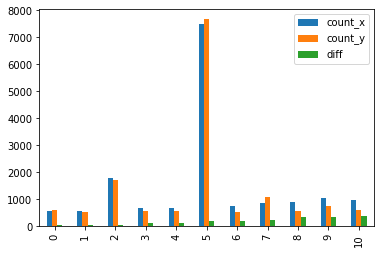

In [197]:
from matplotlib.pyplot import bar
smallestdiff = smallestdiff.drop(columns="index")
smallestdiff
diffplot = smallestdiff.plot.bar()


Upload a zip file containing the files that use used or wrote yourself to the drop box on D2L:

    • You need your notebook and the data files.

    • Make sure your name, CSCI 5015, and the Programming Assignment Number appear in comments in all of your files.

    • Note: NO CREDIT will be given to programming assignments that do not compile.
    
    • Make sure you have compiled and tested your program before handing it in.